<img src=logo.png>

* ref: https://www.kaggle.com/c/digit-recognizer/overview  
❕ csv -> arr

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- visualization (edcoding, grid) -----------

import matplotlib.pyplot as plt
import seaborn as sns

#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# sns.set()


In [54]:
# ------------- tensorflow & keras -----------------
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation

from tensorflow.keras.utils import to_categorical

# ----------------- fixing seed --------------------
np.random.seed(1024)
tf.random.set_seed(1024)

# Dataload

In [4]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
sub = pd.read_csv('dataset/sample_submission.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [13]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [14]:
train.shape, test.shape, sub.shape

((42000, 785), (28000, 784), (28000, 2))

# Data pre-processing

## X_train_arr, y_train_arr, X_test_arr

In [25]:
X=train.drop('label', axis=1)
y=train['label']

In [26]:
X_train_arr=np.array(X)
y_train_arr=np.array(y)

X_test_arr=np.array(test)

In [27]:
X_train_arr.shape, X_test_arr.shape, y_train_arr.shape # X_train is already flattened

((42000, 784), (28000, 784), (42000,))

# EDA

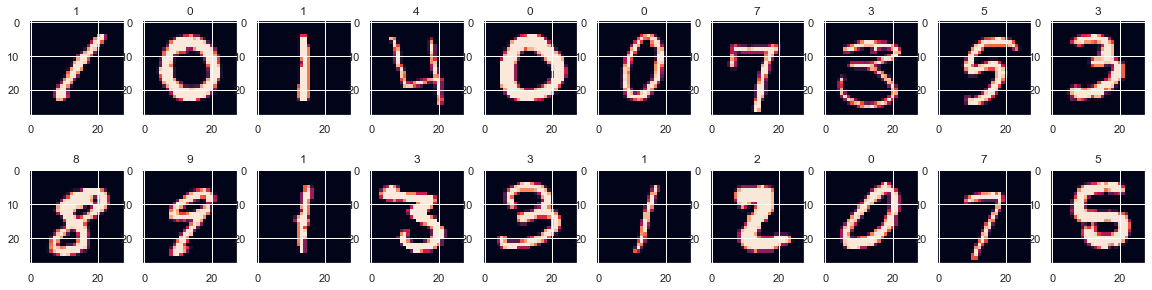

In [45]:
X_train_arr_img=X_train_arr.reshape(42000,28,28)

f, axes = plt.subplots(2,10, figsize=(20,5))

for i, arr in enumerate(X_train_arr_img[:20]):
    r=i//10
    c=i%10
    
    axes[r,c].imshow(arr)
    axes[r,c].set_title(y_train_arr[i])
    
plt.show()

# to_categorical y
y_label : integers in range 0-9

In [55]:
y_train_arr=to_categorical(y=y_train_arr, num_classes=10, dtype='int32')

# train Model

In [56]:
model=Sequential()

model.add(Dense(units=64 , activation='relu' ,input_shape=(28*28,)))
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=17 , activation='relu'))
model.add(Dense(units=16 , activation='relu'))
model.add(Dense(units=10 , activation='softmax')) # multi-classification

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
 dense_3 (Dense)             (None, 32)                800       
                                                                 
 dense_4 (Dense)             (None, 17)                561       
                                                                 
 dense_5 (Dense)             (None, 16)                288       
                                                                 
 dense_6 (Dense)             (None, 10)                1

In [58]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [59]:
res=model.fit(X_train_arr, y_train_arr,
             batch_size=128,
             validation_split=0.2,
             epochs=30
             )

Epoch 1/30
263/263 [==============================] - 2s 4ms/step - loss: 1.5279 - accuracy: 0.5599 - val_loss: 0.6267 - val_accuracy: 0.8169
Epoch 2/30
263/263 [==============================] - 1s 3ms/step - loss: 0.4806 - accuracy: 0.8626 - val_loss: 0.3957 - val_accuracy: 0.8888
Epoch 3/30
263/263 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.9063 - val_loss: 0.3321 - val_accuracy: 0.9095
Epoch 4/30
263/263 [==============================] - 1s 3ms/step - loss: 0.2683 - accuracy: 0.9244 - val_loss: 0.2813 - val_accuracy: 0.9238
Epoch 5/30
263/263 [==============================] - 1s 4ms/step - loss: 0.2224 - accuracy: 0.9374 - val_loss: 0.2420 - val_accuracy: 0.9368
Epoch 6/30
263/263 [==============================] - 1s 3ms/step - loss: 0.1894 - accuracy: 0.9462 - val_loss: 0.2407 - val_accuracy: 0.9356
Epoch 7/30
263/263 [==============================] - 1s 3ms/step - loss: 0.1725 - accuracy: 0.9511 - val_loss: 0.2353 - val_accuracy: 0.9406
Epoch 

# evaluate validation dataset(no val dataset)

# Check overfitting

In [92]:
# res.history

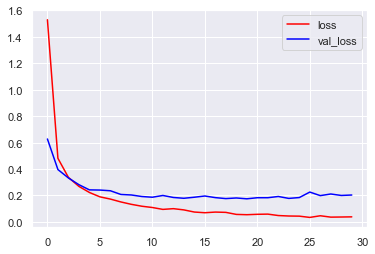

In [73]:
plt.plot(range(len(res.history['loss'])), res.history['loss'], c='red', label='loss')
plt.plot(range(len(res.history['val_loss'])), res.history['val_loss'], c='blue', label='val_loss')
plt.legend()
plt.show()

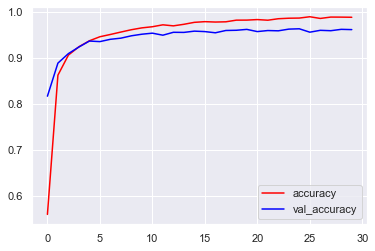

In [75]:
plt.plot(np.arange(len(res.history['accuracy'])), res.history['accuracy'], c='red', label='accuracy')
plt.plot(np.arange(len(res.history['val_accuracy'])), res.history['val_accuracy'], c='blue', label='val_accuracy')
plt.legend()
plt.show()

# prediciton
leaderboard: 0.95803

In [76]:
pred=model.predict(X_test_arr)

In [78]:
pred_list=[]
for arr in pred:
    pred_list.append(np.argmax(arr))

In [85]:
pred_s=pd.Series(pred_list)
sub['Label']=pred_s

In [89]:
sub.to_csv('dataset/sub_v01.csv', index=False)

# Additional featuring
leaderboard: 0.94835

In [142]:
X_train_arr_scaled=X_train_arr/255.0
X_test_arr_scaled=X_test_arr/255.0

## train Model

In [143]:
model=Sequential()

model.add(Dense(units=32, activation='relu' ,input_shape=(28*28,)))
model.add(Dense(units=47 , activation='relu'))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=17 , activation='relu'))
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=27 , activation='relu'))
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=19 , activation='relu'))
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=38 , activation='relu'))
model.add(Dense(units=16 , activation='relu'))
model.add(Dense(units=10 , activation='softmax')) # multi-classification

In [144]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 32)                25120     
                                                                 
 dense_47 (Dense)            (None, 47)                1551      
                                                                 
 dense_48 (Dense)            (None, 24)                1152      
                                                                 
 dense_49 (Dense)            (None, 32)                800       
                                                                 
 dense_50 (Dense)            (None, 17)                561       
                                                                 
 dense_51 (Dense)            (None, 32)                576       
                                                                 
 dense_52 (Dense)            (None, 27)               

In [145]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

## split train data into train & val data

In [146]:
X_train_arr_scaled.shape

(42000, 784)

In [147]:
X_train_arr_scaled_train=X_train_arr_scaled[:-4000]
X_train_arr_scaled_val=X_train_arr_scaled[-4000:]

y_train_arr_train=y_train_arr[:-4000]
y_train_arr_val=y_train_arr[-4000:]

## train

In [148]:
res=model.fit(X_train_arr_scaled_train, y_train_arr_train,
             batch_size=128,
             validation_split=0.2,
             epochs=50
             )

Epoch 1/50
238/238 [==============================] - 2s 5ms/step - loss: 1.2334 - accuracy: 0.5757 - val_loss: 0.5423 - val_accuracy: 0.8457
Epoch 2/50
238/238 [==============================] - 1s 4ms/step - loss: 0.4129 - accuracy: 0.8923 - val_loss: 0.3464 - val_accuracy: 0.9070
Epoch 3/50
238/238 [==============================] - 1s 4ms/step - loss: 0.2964 - accuracy: 0.9220 - val_loss: 0.2758 - val_accuracy: 0.9229
Epoch 4/50
238/238 [==============================] - 1s 4ms/step - loss: 0.2362 - accuracy: 0.9358 - val_loss: 0.2701 - val_accuracy: 0.9228
Epoch 5/50
238/238 [==============================] - 1s 3ms/step - loss: 0.1968 - accuracy: 0.9464 - val_loss: 0.2228 - val_accuracy: 0.9382
Epoch 6/50
238/238 [==============================] - 1s 3ms/step - loss: 0.1788 - accuracy: 0.9493 - val_loss: 0.2187 - val_accuracy: 0.9378
Epoch 7/50
238/238 [==============================] - 1s 3ms/step - loss: 0.1545 - accuracy: 0.9575 - val_loss: 0.2166 - val_accuracy: 0.9397
Epoch 

## evaluate validation dataset

In [149]:
loss_cateforical_crossentropy, metrics_accuracy = model.evaluate(X_train_arr_scaled_val, y_train_arr_val) 

125/125 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.9567


## Check overfitting

In [150]:
# res.history

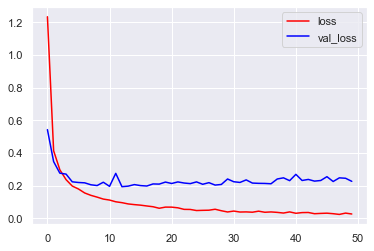

In [151]:
plt.plot(range(len(res.history['loss'])), res.history['loss'], c='red', label='loss')
plt.plot(range(len(res.history['val_loss'])), res.history['val_loss'], c='blue', label='val_loss')
plt.legend()
plt.show()

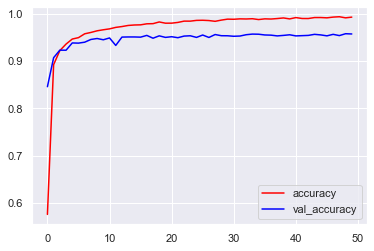

In [152]:
plt.plot(np.arange(len(res.history['accuracy'])), res.history['accuracy'], c='red', label='accuracy')
plt.plot(np.arange(len(res.history['val_accuracy'])), res.history['val_accuracy'], c='blue', label='val_accuracy')
plt.legend()
plt.show()

## prediciton

In [153]:
pred=model.predict(X_test_arr)

In [154]:
pred_list=[]
for arr in pred:
    pred_list.append(np.argmax(arr))

In [155]:
pred_s=pd.Series(pred_list)
sub['Label']=pred_s

In [156]:
sub.to_csv('dataset/sub_v02.csv', index=False)

# no split
leaderboard: 0.93982

## train Model

In [162]:
model=Sequential()

model.add(Dense(units=32, activation='relu' ,input_shape=(28*28,)))
model.add(Dense(units=47 , activation='relu'))
model.add(Dense(units=24 , activation='relu'))
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=17 , activation='relu'))
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=27 , activation='relu'))
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=19 , activation='relu'))
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=38 , activation='relu'))
model.add(Dense(units=16 , activation='relu'))
model.add(Dense(units=10 , activation='softmax')) # multi-classification

In [163]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 32)                25120     
                                                                 
 dense_73 (Dense)            (None, 47)                1551      
                                                                 
 dense_74 (Dense)            (None, 24)                1152      
                                                                 
 dense_75 (Dense)            (None, 32)                800       
                                                                 
 dense_76 (Dense)            (None, 17)                561       
                                                                 
 dense_77 (Dense)            (None, 32)                576       
                                                                 
 dense_78 (Dense)            (None, 27)               

In [164]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

## train

In [165]:
res=model.fit(X_train_arr_scaled, y_train_arr,
             batch_size=128,
             validation_split=0.2,
             epochs=20
             )

Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 1.2773 - accuracy: 0.5488 - val_loss: 0.5879 - val_accuracy: 0.8512
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 0.4830 - accuracy: 0.8798 - val_loss: 0.3932 - val_accuracy: 0.9017
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 0.3390 - accuracy: 0.9171 - val_loss: 0.3395 - val_accuracy: 0.9165
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 0.2830 - accuracy: 0.9312 - val_loss: 0.3275 - val_accuracy: 0.9201
Epoch 5/20
263/263 [==============================] - 1s 3ms/step - loss: 0.2515 - accuracy: 0.9386 - val_loss: 0.3212 - val_accuracy: 0.9202
Epoch 6/20
263/263 [==============================] - 1s 3ms/step - loss: 0.2282 - accuracy: 0.9426 - val_loss: 0.2686 - val_accuracy: 0.9370
Epoch 7/20
263/263 [==============================] - 1s 3ms/step - loss: 0.2052 - accuracy: 0.9477 - val_loss: 0.2697 - val_accuracy: 0.9381
Epoch 

## Check overfitting

In [150]:
# res.history

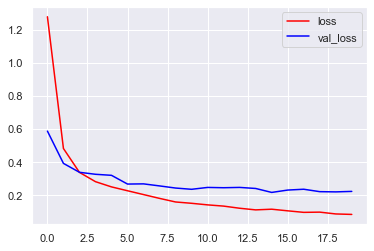

In [166]:
plt.plot(range(len(res.history['loss'])), res.history['loss'], c='red', label='loss')
plt.plot(range(len(res.history['val_loss'])), res.history['val_loss'], c='blue', label='val_loss')
plt.legend()
plt.show()

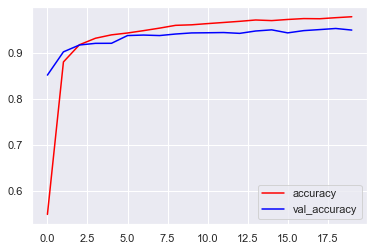

In [167]:
plt.plot(np.arange(len(res.history['accuracy'])), res.history['accuracy'], c='red', label='accuracy')
plt.plot(np.arange(len(res.history['val_accuracy'])), res.history['val_accuracy'], c='blue', label='val_accuracy')
plt.legend()
plt.show()

## prediciton

In [168]:
pred=model.predict(X_test_arr)

In [169]:
pred_list=[]
for arr in pred:
    pred_list.append(np.argmax(arr))

In [170]:
pred_s=pd.Series(pred_list)
sub['Label']=pred_s

In [171]:
sub.to_csv('dataset/sub_v03.csv', index=False)